In [6]:
# Enable interactive rotation of graph
# %matplotlib notebook
%matplotlib inline

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import scipy.io as sio

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')
center_point = np.array([0,0,0])
center_point in X 

False

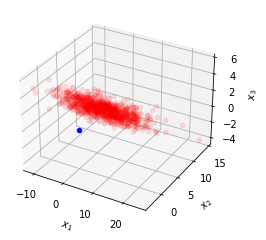

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

# 2) 
# a) Solution:
# The data appears to be concentrated along a line, or even more so in a plane, but the line/plane does not include the 
# origin so it cannot be a subspace

# b) Solution:
# Remove the average value of the data. This will center the cloud to the origin and a line/plane approximation will then
# include the origin  

In [3]:
# Subtract mean
X_m = X - np.mean(X, 0)

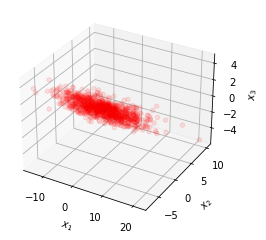

In [4]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()
# c) Solution:
# Yes, a line through the origin captures the majority of the variability in the data, and a plane even more.


In [5]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = VT[0]
a
# d) Solution:
# a = V(:,1)
# The line lines up with the major axis of the data point cloud.  

array([-0.87325954, -0.43370914,  0.2220679 ])

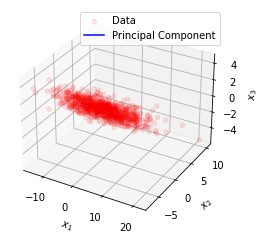

In [59]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

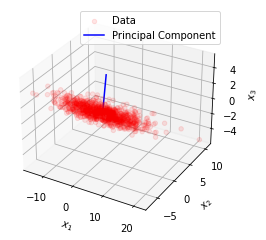

In [60]:
# h) 
a_2 = VT[1]

S_matrix = np.zeros_like(X_m) 
np.fill_diagonal(S_matrix, s)

#Rank-2 aprox
X_2_approx = S_matrix[0,0]*U[:,0:1]@VT[0:1,:]+S_matrix[1,1]*U[:,1:2]@VT[1:2,:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_2_approx)[0])

ax.scatter(X_2_approx[:,0], X_2_approx[:,1], X_2_approx[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a_2[0]],[0,ss*a_2[1]],[0,ss*a_2[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()


In [61]:
S_matrix = np.zeros_like(X_m) 
np.fill_diagonal(S_matrix, s)

#Rank-1 aprox
X_1_approx = S_matrix[0,0]*U[:,0:1]@VT[0:1,:]

In [73]:
E_2 = X_m - X_2_approx
E_1 = X_m - X_1_approx

print("Frobenius Norm of E in Rank-1 approximation: " ,np.linalg.norm(E_1, ord='fro'))
print("Frobenius Norm of E in Rank-2 approximation: " ,np.linalg.norm(E_2, ord='fro'))

Frobenius Norm of E in Rank-1 approximation:  25.03377559191337
Frobenius Norm of E in Rank-2 approximation:  12.367116712429967


In [84]:
def select_randoms():
    to_return = [None,None,None,None,None,None]
    for i in range(len(to_return)):
        random_num = np.random.randint(0,9)   
        while random_num in to_return:
            random_num = np.random.randint(0,9)
        to_return[i] = random_num
    return to_return

In [232]:
def get_u_and_y(randoms,U,y):
    randoms.sort()
    j = randoms[0]
    new_u = U[j+(j*16):(j+(j*16))+16]
    new_y = y[(j+(j*16)):(j+(j*16))+16]
    for i in range(len(randoms)):
        j = randoms[i]
        new_y = np.concatenate((new_y,y[(j+(j*16)):(j+(j*16))+16]))
        new_u = np.concatenate((new_u,U[j+(j*16):(j+(j*16))+16]))
    return new_u,new_y

In [233]:
def get_w(randoms, V, S, U, y):
    new_u,new_y = get_u_and_y(randoms,U,y)
    return V@S@new_u.transpose()@new_y

In [236]:
# 3) 
# a)

data = loadmat('face_emotion_data.mat')
X = data['X']
y = data['y']

U,s,VT = np.linalg.svd(X, full_matrices= False)
S = np.arange(81).reshape(9,9)
S_matrix = np.zeros_like(S) 
np.fill_diagonal(S_matrix, s)

S_matrix_inverse = np.zeros_like(S_matrix)
S_matrix_inverse = np.float_(S_matrix_inverse)

for i in range (0,9):
    S_matrix_inverse[i][i] = 1/S_matrix[i][i]

error_rates = np.float_(np.arange(56))
min_error_rate = None
min_random_group = np.array([0,0,0,0,0,0])

for k in range(56):
    misclassiffications = 0
    randoms = np.array([0,0,0,0,0,0]) 
    randoms = select_randoms()
    w = get_w(randoms,VT.transpose(),S_matrix_inverse,U,y)
    y_hat = np.sign(X@w)
    aux = y_hat - y
    for value in aux:
        if value != 0:
            misclassiffications += 1
    error_rates[k] = misclassiffications/96
    if min_error_rate == None or error_rates[k] < min_error_rate:
        min_error_rate = error_rates[k]
        min_random_group = randoms

print(error_rates)
print("Mean error rate: " ,error_rates.mean())
print("Group: " ,min_random_group, "Error rate: ", min_error_rate)


[0.08333333 0.0625     0.08333333 0.11458333 0.10416667 0.04166667
 0.10416667 0.08333333 0.08333333 0.04166667 0.0625     0.08333333
 0.0625     0.04166667 0.10416667 0.07291667 0.0625     0.03125
 0.05208333 0.08333333 0.07291667 0.05208333 0.0625     0.07291667
 0.08333333 0.08333333 0.11458333 0.04166667 0.09375    0.08333333
 0.09375    0.08333333 0.09375    0.0625     0.0625     0.07291667
 0.04166667 0.02083333 0.03125    0.0625     0.08333333 0.07291667
 0.0625     0.10416667 0.08333333 0.08333333 0.07291667 0.10416667
 0.08333333 0.07291667 0.0625     0.02083333 0.08333333 0.10416667
 0.10416667 0.10416667]
Mean error rate:  0.07403273809523811
Group:  [1, 3, 4, 5, 6, 7] Error rate:  0.020833333333333332


In [237]:
def get_w_ridge(randoms, V, S, lambda_matrix, U, y):
    new_u,new_y = get_u_and_y(randoms,U,y)
    return V@np.linalg.inv((S@S) + lambda_matrix)@S@new_u.transpose()@new_y
    

In [245]:
# b)
lambdas = np.array([0, 2**(-1), 1, 2, 2**2, 2**3, 2**4])

U,s,VT = np.linalg.svd(X,full_matrices=False)
S = np.arange(81).reshape(9,9)
S_matrix = np.zeros_like(S) 
np.fill_diagonal(S_matrix, s)

aux = np.arange(81).reshape(9,9)
lambda_complete = np.float_(np.zeros_like(aux))

min_error_rate_ridge = np.array([None,None,None,None,None,None,None])
avg_error_rate_ridge = np.float_(np.array([0,0,0,0,0,0,0]))
min_random_group_ridge = np.array([[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]])

for i in range(len(lambdas)):
    error_rates_ridge = np.float_(np.arange(56))
    for k in range(56):
        misclassiffications = 0
        randoms = select_randoms()
        j=0
        np.fill_diagonal(lambda_complete, [lambdas[i]]*9)
        w = get_w_ridge(randoms,VT.transpose(),S_matrix_inverse,lambda_complete,U,y)
        y_hat = np.sign(X@w)
        aux = y_hat - y
        for value in aux:
            if value != 0:
                misclassiffications += 1
        error_rates_ridge[k] = misclassiffications/96
        if min_error_rate_ridge[i] == None or error_rates_ridge[k] < min_error_rate_ridge[i]:
            min_error_rate_ridge[i] = error_rates[k]
            min_random_group_ridge[i] = randoms
    avg_error_rate_ridge[i] = error_rates_ridge.mean()

for i in range(len(min_error_rate_ridge)):
    print("Lambda = ", lambdas[i] , ": \t\t Group: ", min_random_group_ridge[i], " \nError rate: ", min_error_rate_ridge[i], " \t Mean error rate: ", avg_error_rate_ridge[i])
    print()

Lambda =  0.0 : 		 Group:  [0 1 3 4 5 6]  
Error rate:  0.08333333333333333  	 Mean error rate:  0.2540922619047619

Lambda =  0.5 : 		 Group:  [0 4 5 6 7 8]  
Error rate:  0.10416666666666667  	 Mean error rate:  0.052827380952380945

Lambda =  1.0 : 		 Group:  [2 3 4 5 6 8]  
Error rate:  0.10416666666666667  	 Mean error rate:  0.05487351190476191

Lambda =  2.0 : 		 Group:  [1 2 3 4 6 7]  
Error rate:  0.020833333333333332  	 Mean error rate:  0.05915178571428571

Lambda =  4.0 : 		 Group:  [1 2 3 4 7 8]  
Error rate:  0.03125  	 Mean error rate:  0.0582217261904762

Lambda =  8.0 : 		 Group:  [1 2 3 6 7 8]  
Error rate:  0.03125  	 Mean error rate:  0.06566220238095238

Lambda =  16.0 : 		 Group:  [1 2 3 6 7 8]  
Error rate:  0.03125  	 Mean error rate:  0.06547619047619048



In [8]:
data = sio.loadmat('face_emotion_data.mat')
X,y = data['X'], data['y']

err_sum = 0
for i in range(8):
    for j in range(8):
        if i == j: continue
        test_idx_1 = np.arange(i*16, (i+1)*16)
        test_idx_2 = np.arange(j*16, (j+1)*16)
        train_idx = np.setdiff1d(np.arange(128), test_idx_1)
        train_idx = np.setdiff1d(train_idx, test_idx_2)
        X_train, y_train = X[train_idx, :], y[train_idx, :]
        X_test_1, y_test_1 = X[test_idx_1, :], y[test_idx_1, :]
        X_test_2, y_test_2 = X[test_idx_2, :], y[test_idx_2, :]
        min_err, min_r, min_w = np.inf, -1, None
        for r in range (1,10):
            U,s,VT = np.linalg.svd(X_train)
            w = VT[:r,:].T@np.diag(1/s[:r])@U[:,:r].T@y_train
            err_ = np.mean(np.sign(X_test_1@w) != y_test_1)
            if err_ < min_err:
                min_err, min_r, min_w = err_, r, w
        err_sum += np.mean(np.sign(X_test_2@min_w) != y_test_2)
print(err_sum/8/7)

0.11160714285714286


In [9]:
err_sum = 0
for i in range(8):
    for j in range(8):
        if i == j: continue
        test_idx_1 = np.arange(i*16, (i+1)*16)
        test_idx_2 = np.arange(j*16, (j+1)*16)
        train_idx = np.setdiff1d(np.arange(128), test_idx_1)
        train_idx = np.setdiff1d(train_idx, test_idx_2)
        X_train, y_train = X[train_idx, :], y[train_idx, :]
        X_test_1, y_test_1 = X[test_idx_1, :], y[test_idx_1, :]
        X_test_2, y_test_2 = X[test_idx_2, :], y[test_idx_2, :]
        min_err, min_r, min_w = np.inf, -1, None
        for la in [0]+[2.**i for i in range(-1,5)]:
            U,s,VT = np.linalg.svd(X_train, full_matrices=False)
            w = VT.T@np.diag(s/(s**2+la))@U.T@y_train
            err_ = np.mean(np.sign(X_test_1@w) != y_test_1 )
            if err_ < min_err:
                min_err, min_r, min_w = err_, r, w
        err_sum += np.mean(np.sign(X_test_2@min_w) != y_test_2)

print(err_sum/8/7)
# So ridge regression appears to result in a better classifier in this problem

0.04799107142857143
